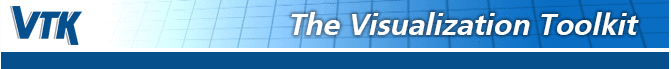

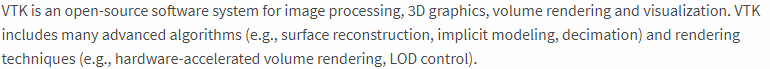

# AR & VR with 3D Slicer
AR: https://vtk.org/flavors/#ar-and-vr
VR: https://blog.kitware.com/slicervirtualreality/

# Examples in Python
https://lorensen.github.io/VTKExamples/site/Python/

# Documentation (Books)
https://vtk.org/documentation/

# Python's Library
https://pypi.org/project/vtk/

### Possible Issues due to OpenGl version < 2.0
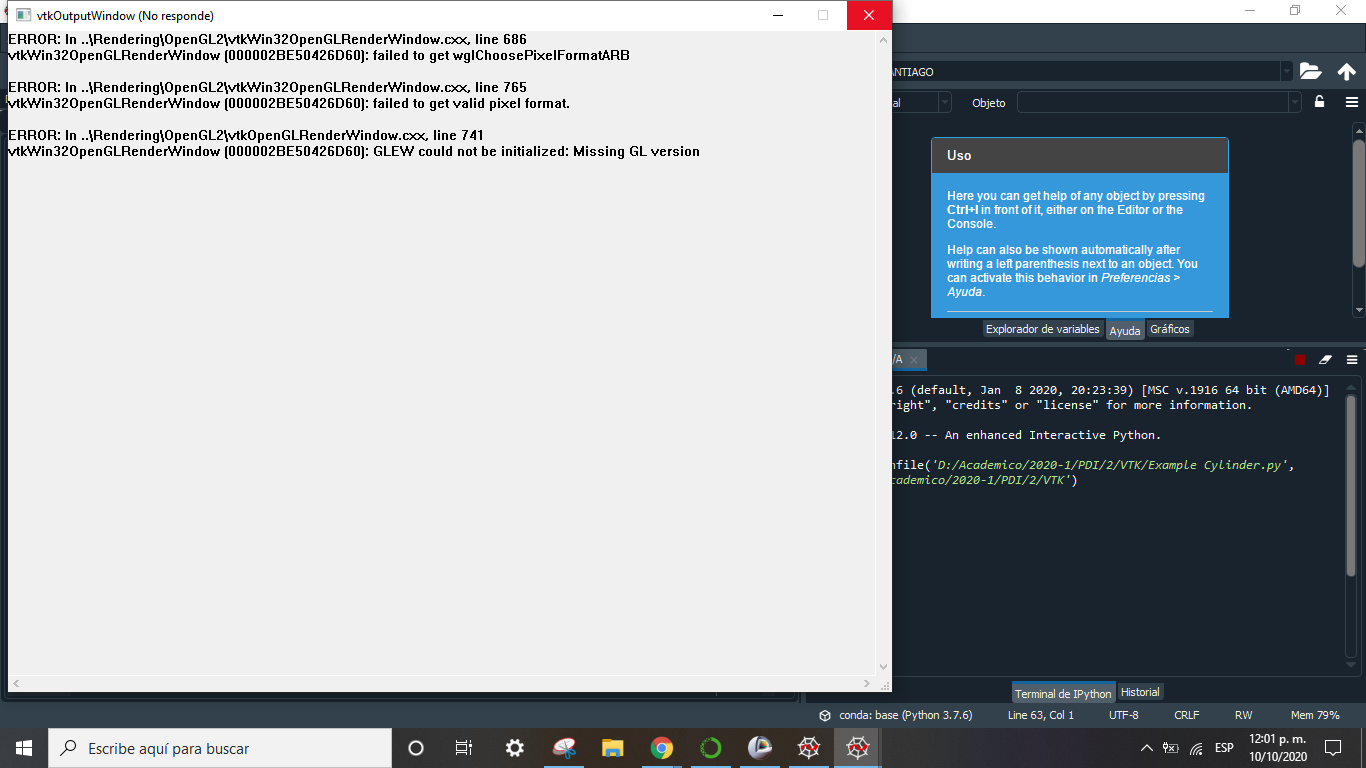

# Theory

## Rendering Process:
**Ray-Tracing or Ray-Casting** is a technique for 3D visualization in a computer, which determines the contribution of the Rays that lit the object the user is looking at. 

## Rendering categories:
image-order -> Draw Pixel by pixel -> Specialized Hardware (GPU -> Multiple CPU to make the process in parallel)               
object-order -> object by object in a scene. i.e: first sky, then ground. Order (back to front or inverse)

## Surface Rendering:
Use of math model with points, lines, triangles, 2D or 3D splines

## Scene:
                                                                                                                     
Rendering process = Render a Scene. A Scene is composed by:
- Actors -> graphical data or objects 
- Lights illuminate the actors 
- Camera constructs a picture by projecting the actors onto a view plane.                                                              

## Colors:
## RGB and HSV Systems:

RGB -> Red / Green / Blue                                                                                               
HSV -> Hue / Saturation / Value (Tono: Lambda Dominante / Saturación / Intensidad o Brillo)

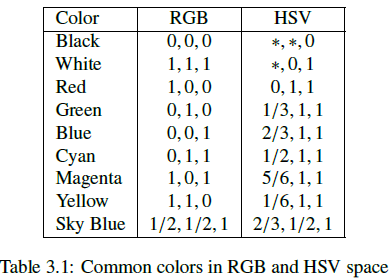

- Hue: Represent as a Circle
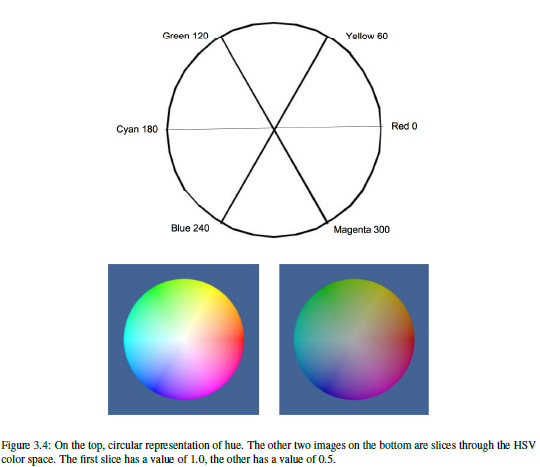

- Saturation: how much hue is mixed into the color                                                                           
i.e:                                                                                                                           
value = 1 (bright color)                                                                                                       
hue = 0.66 -> blue                                                                                                             
result = light blue                                                                                                                                                                      
- Value: (0 -> black) & (1 -> Bright)

# Lights: (Pg 40)
Math Model: 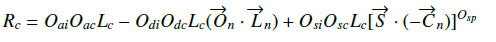
Result: Color per point that control amount of **ambient, diffuse and specular lighting**

# Cameras:
We need to render the scene in the camera (project 3D scene onto a 2D Plane):                                                 
Factors (Pg 42): **Position / Orientation / Focal Point**                                                        
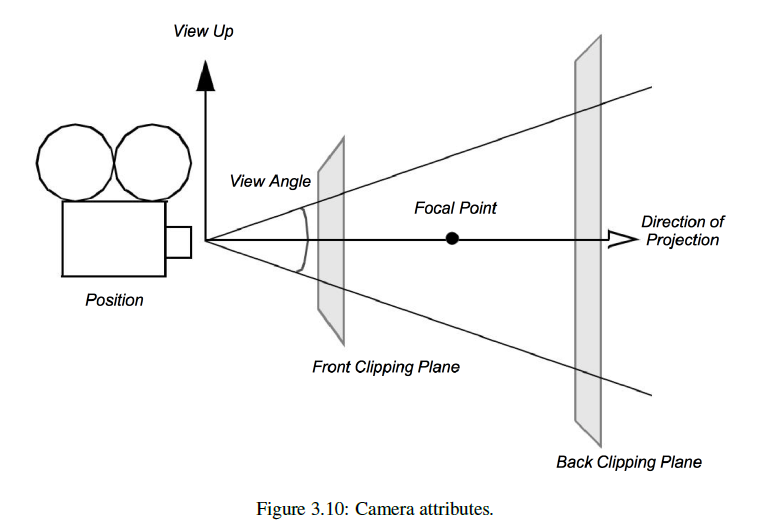


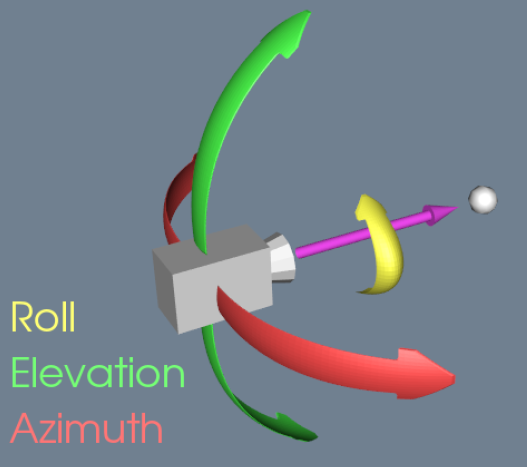

# Coordinate Transformation:
**Homogeneus Coordinate**
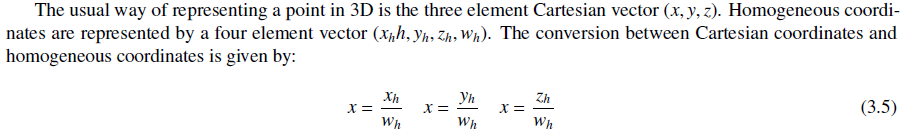


- Perspective transformation
- Translation
- Scaling 
- Rotation

All of above couldn't be performed by 3x3 matrix

**Operations with matrix are shown in page 46**

# Display Requirements
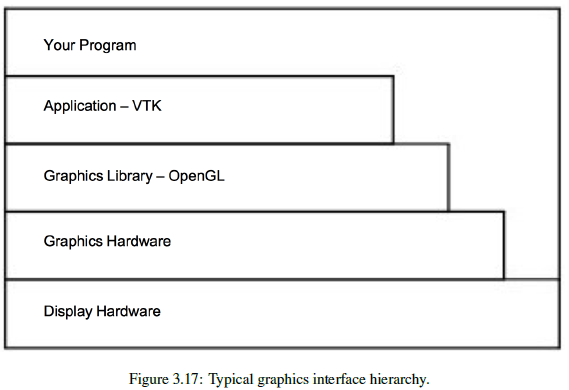

# Scan conversion or Rasterization
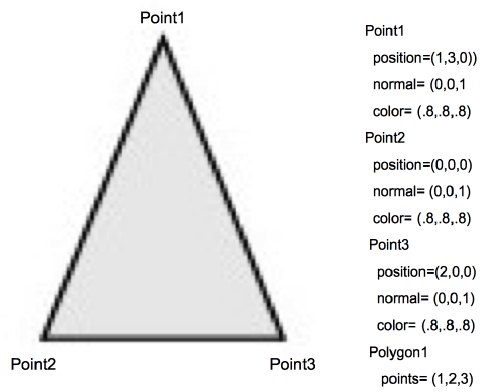

# The Pipeline:
Data -> Primitive Graphics -> Computer Images
Visualization: Functional Models + Objects Models

- Functional Models: Transformations

- Math Eq (x,y,z)
- Sample data on a grid of 50x50x50                                                                                       
a) 3D surface **F(x,y,z) = constant**                                                                                         
b) Show of 3 planes that cut through the data and are colored by function value                                               
c) 3 planes that have been contoured with constant valued lines                                                           
d) Around each place a wireframe outline


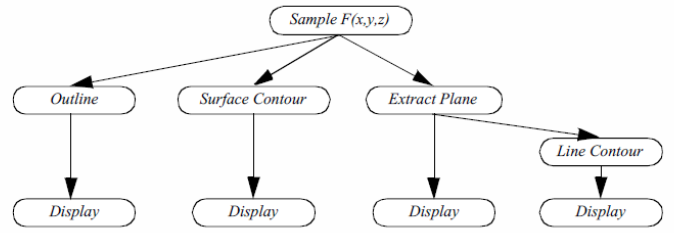

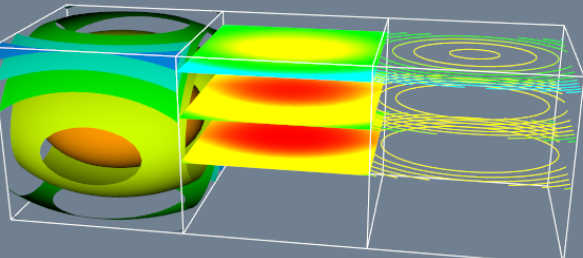

# Advance Computer Graphics (Pg 246 of TextBook and 80 of UsersGuide)
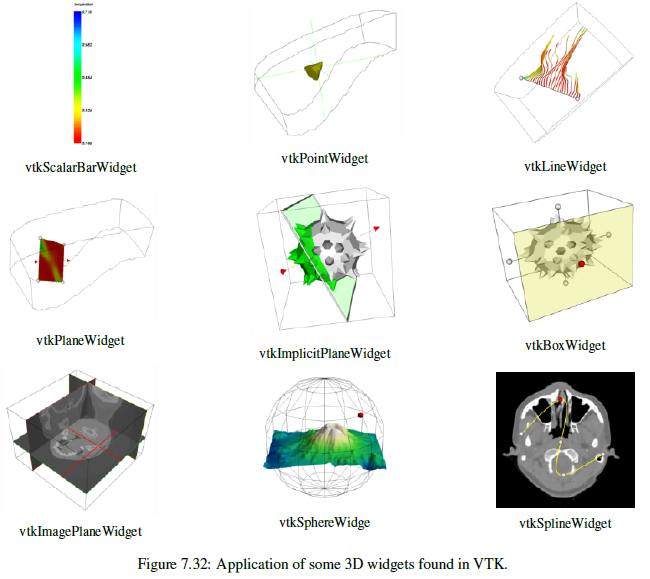

# Graphics Model: 7 Principal objects to render a scene

- vtkRenderwindow: Window where the renders are drawn
- vtkRender: coordinate rendering process (lights, cameras & actors)
- vtkLight: Iluminate the scene
- vtkCamera: Define view properties
- vtkActor: objects rendered in the scene (subclass of vtkProp)
- vtkProperty: Actor's ppeareance
- vtkMapper: Actor's Geometry

# Recordemos de Python:

In [3]:
# lambda variable(s) : expresion
test = lambda x: x+1
test(2)

3

In [16]:
def aumentar(numero):
    return numero + 1

numeros = [1, 2, 3]

# Test:
print(aumentar(numeros[0]))

2


In [20]:
resultado = map(aumentar,nutmeros)
print(type(resultado)) # El resultado es un mapeo
print(list(resultado)) # que se puede listar

<class 'map'>
[2, 3, 4]


In [30]:
bkg = map(lambda x: x / 255.0, [26, 51, 102, 255])
list(bkg)

[0.10196078431372549, 0.2, 0.4, 1.0]

# Hands on!

In [22]:
import vtk

# VTK Named Color

La herencia de dicha clase se puede ver en la siguiente figura:

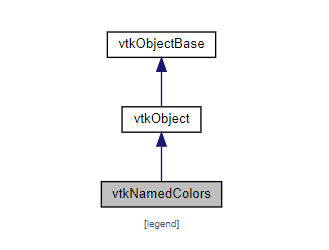

Esta clase se usa para darle los colores deseados a todos los objetos que se mostrarán en la escena del vtk. Con ella se pueden establecer los colores tanto de los sólidos creados, el color de fondo, aristas, líneas, etc. La documentación de dicha clase se puede ver en el siguiente link:

https://vtk.org/doc/nightly/html/classvtkNamedColors.html#a744eda1ee1d578dd252fc4e31620c032

In [25]:
colors = vtk.vtkNamedColors()
# Set the background color.
bkg = map(lambda x: x / 255.0, [26, 51, 102, 255])
colors.SetColor("BkgColor", *bkg)

# VTK Geometrics Objects

Estos son los objetos que pueden ser cargados en las escenas de VTK, en realidad hay muchos objetos de este estilo y lo más recomendable es consultar por ellos en su respectiva API. Esta puede verse en el siguiente link:
https://lorensen.github.io/VTKExamples/site/Python/

In [3]:
# This creates a polygonal cylinder model with eight circumferential
# facets.
cylinder = vtk.vtkCylinderSource()
cylinder.SetResolution(8)

# VTK PolyDataMapper

La herencia de dicha clase puede verse en la siguiente figura:

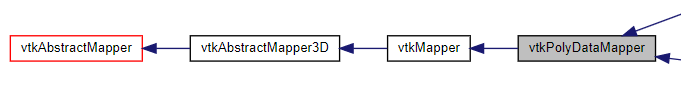

Esta clase permite insertar en los objetos creados en las escenas. Una explicación más detallada puede verse en el siguiente link:
https://vtk.org/doc/nightly/html/classvtkPolyDataMapper.html

In [4]:
# The mapper is responsible for pushing the geometry into the graphics
# library. It may also do color mapping, if scalars or other
# attributes are defined.
cylinderMapper = vtk.vtkPolyDataMapper()
cylinderMapper.SetInputConnection(cylinder.GetOutputPort())

# VTK Actor

se utiliza para representar un objeto en una escena de renderizado y hace referencia a la geometría que define. Es decir, con él se le pueden dar características no a la escena sino al objeto mismo de dicha escena, se pueden hacer rotaciones, cambiar texturizado, entre otros. (También es importante recalcar que a este actor se le debe establecer un mapeador, DataMapper)

Para más información por favor ver:
https://vtk.org/doc/nightly/html/classvtkActor.html

In [5]:
# The actor is a grouping mechanism: besides the geometry (mapper), it
# also has a property, transformation matrix, and/or texture map.
# Here we set its color and rotate it -22.5 degrees.
cylinderActor = vtk.vtkActor()
cylinderActor.SetMapper(cylinderMapper)
cylinderActor.GetProperty().SetColor(colors.GetColor3d("Tomato"))
cylinderActor.RotateX(30.0)
cylinderActor.RotateY(-45.0)

# VTK Renderer & VTK RenderWindow

La herencia de dicha imagen puede verse en la siguiente figura:
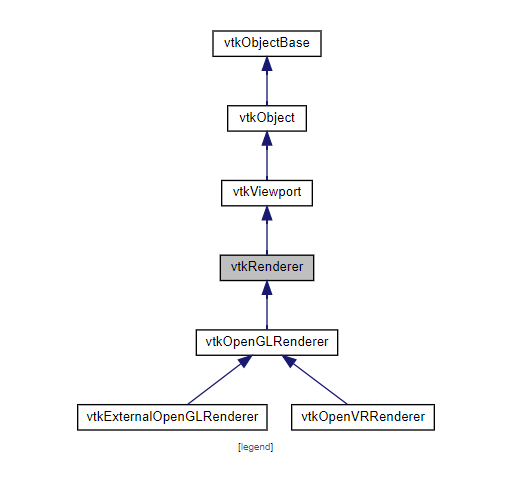

Un renderizador es un objeto que controla el proceso de representación gráfica de objetos. La renderización es el proceso de convertir la geometría, una especificación de luces y una vista de cámara en una imagen. vtkRenderer también realiza la transformación de coordenadas entre las coordenadas mundiales, las coordenadas de vista (el sistema de coordenadas de representación de gráficos por computadora) y las coordenadas de visualización (las coordenadas de pantalla reales en el dispositivo de visualización).

Una ventana de renderizado es una ventana en una interfaz gráfica de usuario donde se dibujan su imágenes. vtkRenderWindow proporciona métodos para sincronizar el proceso de renderizado, establecer el tamaño de la ventana entre otros.

Para más información ir a los siguientes links:
https://vtk.org/doc/nightly/html/classvtkRenderer.html
https://vtk.org/doc/nightly/html/classvtkRenderWindow.html

In [6]:
# Create the graphics structure. The renderer renders into the render
# window. The render window interactor captures mouse events and will
# perform appropriate camera or actor manipulation depending on the
# nature of the events.
ren = vtk.vtkRenderer()
renWin = vtk.vtkRenderWindow()
renWin.AddRenderer(ren)
iren = vtk.vtkRenderWindowInteractor() # Pg 59 of UsersGuide: Provide position and motion sensitive / Pg 60: Key Shortcuts
iren.SetRenderWindow(renWin)

In [7]:
# Add the actors to the renderer, set the background and size
ren.AddActor(cylinderActor) # Pg 67 of UsersGuide
ren.SetBackground(colors.GetColor3d("BkgColor"))
renWin.SetSize(300, 300)
renWin.SetWindowName('Cylinder')

In [8]:
# This allows the interactor to initalize itself. It has to be
# called before an event loop.
iren.Initialize()

In [10]:
# We'll zoom in a little by accessing the camera and invoking a "Zoom"
# method on it.
ren.ResetCamera()
ren.GetActiveCamera().Zoom(1.5)
renWin.Render()

In [9]:
# Start the event loop.
iren.Start()

# Summary
**Pipeline Start ::** Source -> Polygonal representation -- Is INPUT --> Mapper <-- Actor **:: Pipeline End**

### To render the actor --> need *Graphics objects*

**iren** -> **3D Widget** (Is the window that allows Camera manipulation)                                                  
**ren** -> vtkRender **Instance** (**coordinate** rendering process in **iren**)



# Notes:
- In VTK, if lights and cameras are not directly created, the renderer automatically instantiates them.
- Objects in VTK that are to be drawn in the render window are generically known as “props.” **vtkActor is a type of vtkProp3D**

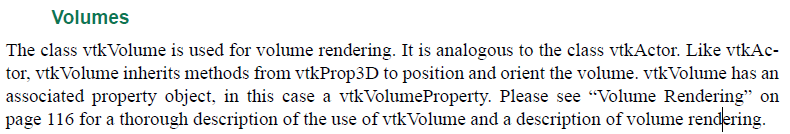

# Other VTK Sources:

## Importers (Pg 259)
Accept data files that contain multiple datasets
and/or the objects that compose a scene
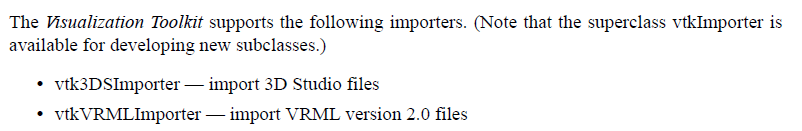

# Readers (Pg 253)

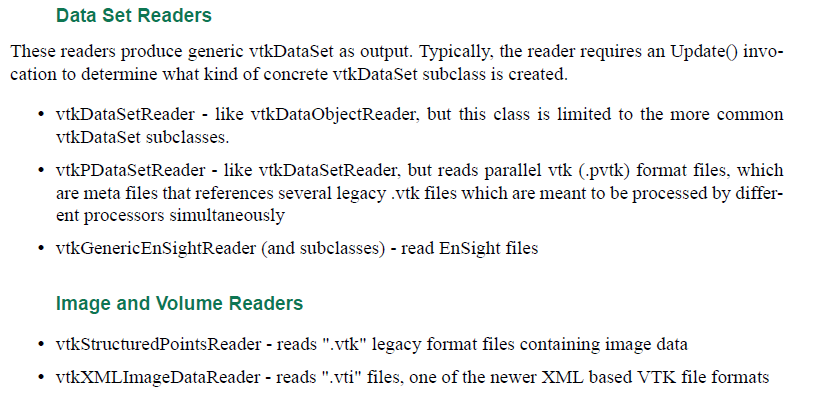

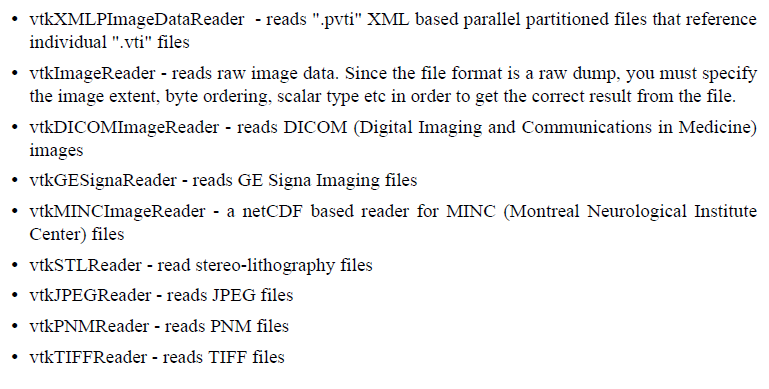

# Your Turn!
Click [here](https://lorensen.github.io/VTKExamples/site/Python/), Choose and download one of the examples, try to run it! and **describe** on the **last post of the classroom**, the **function** of any element in your example 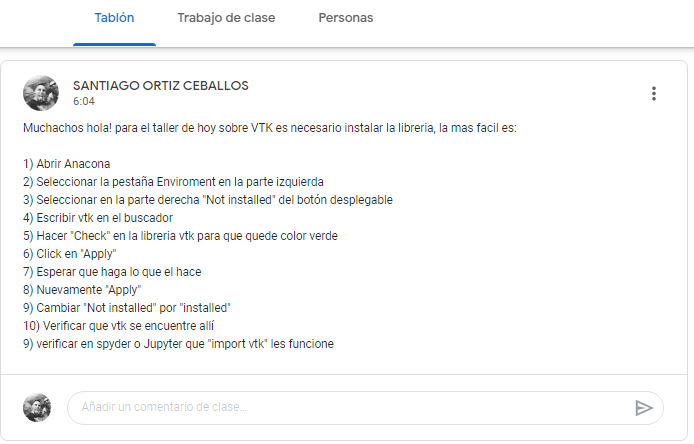 